For this activity, we work as a consultant for an airline. The airline is interested in knowing if a better in-flight entertainment experience leads to higher customer satisfaction. They would like we to construct and evaluate a model that predicts whether a future customer would be satisfied with their services given previous customer feedback about their flight experience.

The data for this activity is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. Our goal will be to utilize a binomial logistic regression model to help the airline model and better understand this data.

Because this activity uses a dataset from the industry, we will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, we will practice the following skills:

Importing packages and loading data
Exploring the data and completing the cleaning process
Building a binomial logistic regression model
Evaluating a binomial logistic regression model using a confusion matrix

In [2]:
# Standard operational package imports
import pandas as pd
import numpy as np

# Important imports for preprocessing, modeling, and evaluation
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
file_path = "../data/raw/Invistico_Airline.csv"
df_original = pd.read_csv(file_path)

In [4]:
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [5]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [6]:
df_original['satisfaction'].value_counts(dropna = False)

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

In [8]:
# Display proportions
df_original['satisfaction'].value_counts(normalize=True) * 100


satisfaction
satisfied       54.73283
dissatisfied    45.26717
Name: proportion, dtype: float64

In [9]:
df_original.isnull().sum()


satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [10]:
df_subset = df_original.dropna(axis=0).reset_index(drop=True)


Prepare the data
If you want to create a plot (sns.regplot) of your model to visualize results later in the notebook, the independent variable Inflight entertainment cannot be "of type int" and the dependent variable satisfaction cannot be "of type object."

Make the Inflight entertainment column "of type float."

In [11]:
df_subset['Inflight entertainment'] = df_subset['Inflight entertainment'].astype(float)


In [12]:
df_subset['satisfaction'] = OneHotEncoder(drop='first').fit_transform(df_subset[['satisfaction']]).toarray()

In [13]:
df_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1.0,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1.0,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1.0,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1.0,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,1.0,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,1.0,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,1.0,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,1.0,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,1.0,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Create the training and testing data¶
Put 70% of the data into a training set and the remaining 30% into a testing set. Create an X and y DataFrame with only the necessary variables.

In [15]:
# Define X and y (only the variables needed for the model)
X = df_subset[['Inflight entertainment']]  # independent variable
y = df_subset['satisfaction']              # dependent variable (already converted to numeric)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (90640, 1)
Testing set size: (38847, 1)


Fit a LogisticRegression model to the data
Build a logistic regression model and fit the model to the training data.

In [16]:
clf = LogisticRegression().fit(X_train,y_train)

Create a plot of your model
Create a plot of your model to visualize results using the seaborn package.

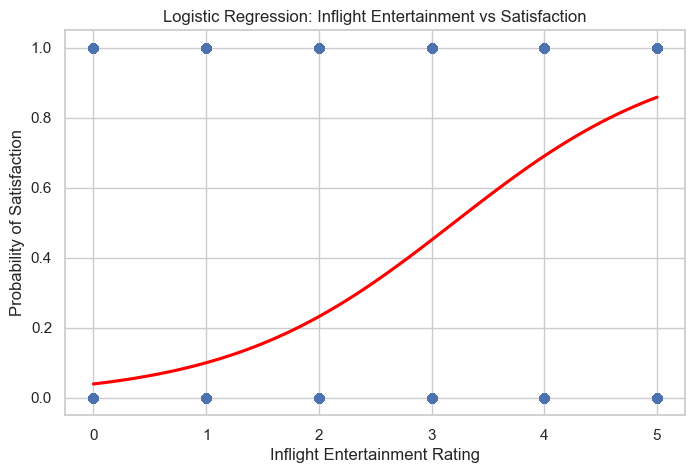

In [17]:
# Create the plot
plt.figure(figsize=(8, 5))
sns.regplot(
    x=X_train['Inflight entertainment'],
    y=y_train,
    logistic=True,         # this tells Seaborn to fit a logistic regression curve
    ci=None,               # no confidence interval shading
    line_kws={'color': 'red'}
)

# Labels and title
plt.xlabel('Inflight Entertainment Rating')
plt.ylabel('Probability of Satisfaction')
plt.title('Logistic Regression: Inflight Entertainment vs Satisfaction')
plt.ylim(-0.05, 1.05)  # keep y-axis in valid probability range

plt.show()

Predict the outcome for the test dataset
Now that you've completed your regression, review and analyze your results. First, input the holdout dataset into the predict function to get the predicted labels from the model. Save these predictions as a variable called y_pred.

In [19]:
y_pred = clf.predict(X_test)
print(y_pred)

[0. 1. 0. ... 0. 0. 1.]


In [20]:
# Use predict_proba to output a probability.

### YOUR CODE HERE ###
clf.predict_proba(X_test)

array([[0.90021992, 0.09978008],
       [0.14157564, 0.85842436],
       [0.54951296, 0.45048704],
       ...,
       [0.54951296, 0.45048704],
       [0.54951296, 0.45048704],
       [0.30964474, 0.69035526]], shape=(38847, 2))

In [22]:
clf.predict(X_test)

array([0., 1., 0., ..., 0., 0., 1.], shape=(38847,))

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

# Display all metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Accuracy:  0.8004
Precision: 0.8128
Recall:    0.8255
F1 Score:  0.8191


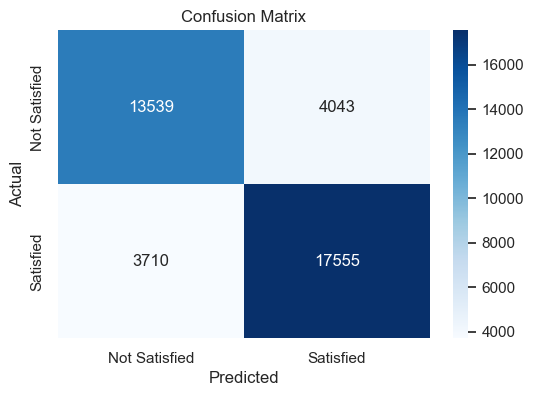

In [26]:
from sklearn.metrics import confusion_matrix
 

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it using seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Satisfied', 'Satisfied'], yticklabels=['Not Satisfied', 'Satisfied'])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
